In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [17]:
register_matplotlib_converters()

df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=['date'], index_col='date')

print(df.head(), '\n', df.shape)

            value
date             
2016-05-09   1201
2016-05-10   2329
2016-05-11   1716
2016-05-12  10539
2016-05-13   6933 
 (1304, 1)


In [19]:
# Clean data
df = df[(df['value'] < df['value'].quantile(0.975)) & (df['value'] > df['value'].quantile(0.025))]

print(df.head(), '\n', df.shape)

            value
date             
2016-06-17  21691
2016-06-18  21681
2016-06-20  28508
2016-06-21  26805
2016-06-25  21923 
 (1176, 1)


Text(0, 0.5, 'Page Views')

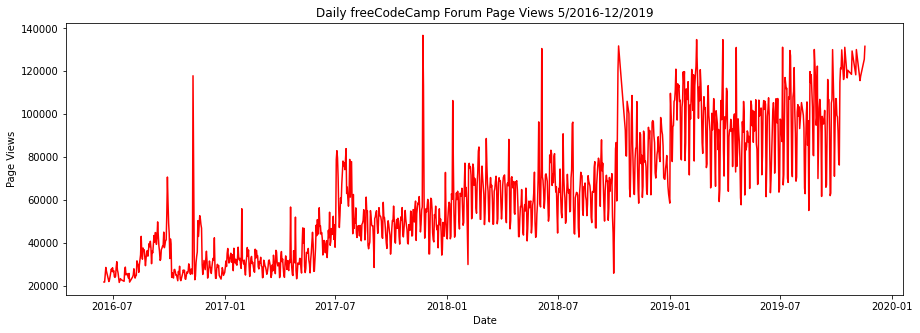

In [21]:
# Draw line plot
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], 'r', linewidth=1.5)
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

Text(0, 0.5, 'Average Page Views')

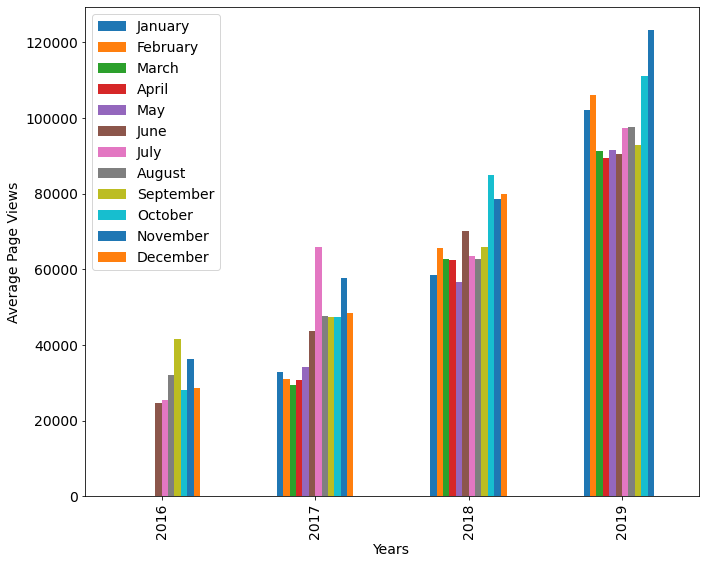

In [22]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()

df_bar['month'] = df.index.month
df_bar['year'] = df.index.year

df_bar = df_bar.groupby(['year','month'])['value'].mean()
df_bar = df_bar.unstack()

# Draw bar plot
fig = df_bar.plot.bar(legend=True, figsize=(11,9), fontsize=14).figure
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Average Page Views', fontsize=14)

Text(0.5, 0, 'Month')

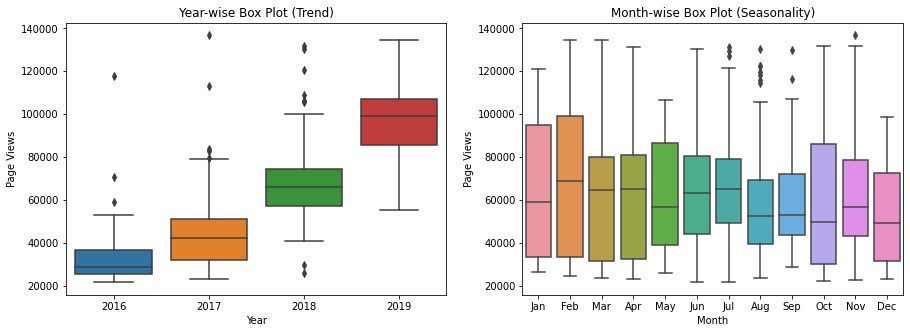

In [23]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax = axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_ylabel('Page Views')
axes[0].set_xlabel('Year')
axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax = axes[1])
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_ylabel('Page Views')
axes[1].set_xlabel('Month')